In [16]:
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

read: belevskaya_06_su.wav
(11025,)


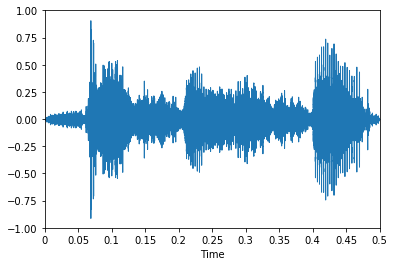

read: belevskaya_07_su.wav
(46857,)


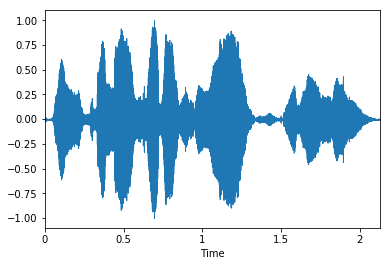

read: belevskaya_b01.wav
(132300,)


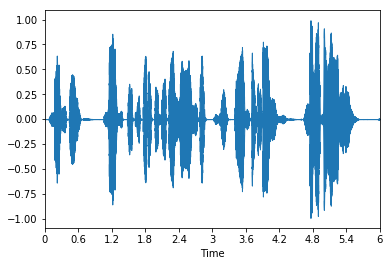

read: belevskaya_b02.wav
(77175,)


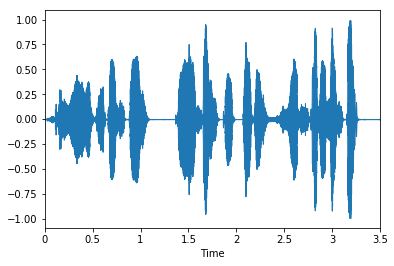

read: belevskaya_b03.wav
(11025,)


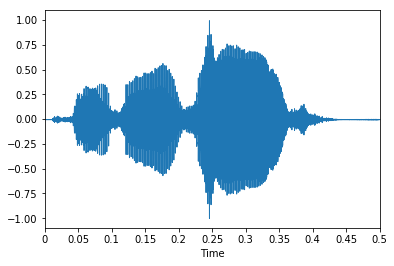

read: belevskaya_b04.wav
(66150,)


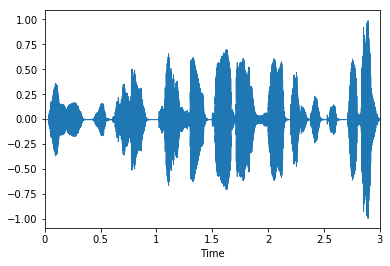

read: belevskaya_b05.wav
(56147,)


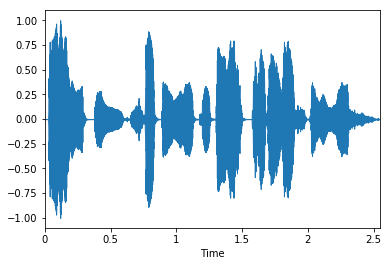

read: belevskaya_b06.wav
(11784,)


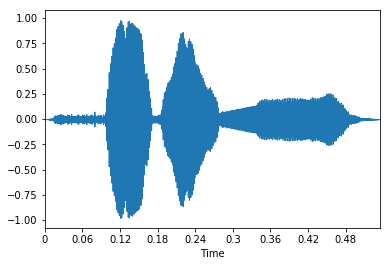

read: belevskaya_b07.wav
(55125,)


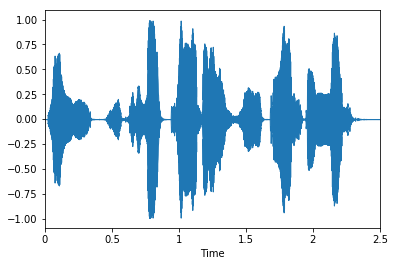

read: belevskaya_b08_su.wav
(33075,)


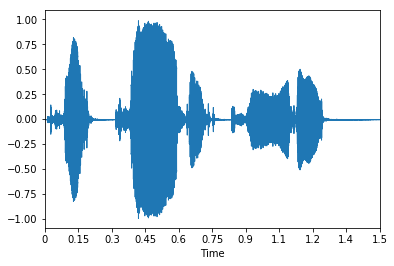

read: belevskaya_b09_su.wav
(16538,)


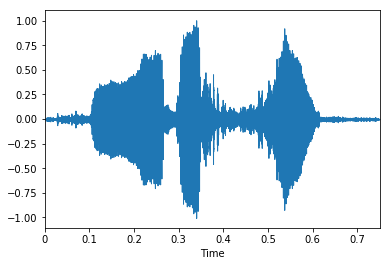

read: belevskaya_b10.wav
(12553,)


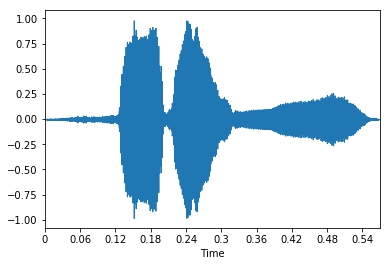

read: belevskaya_b11.wav
(56468,)


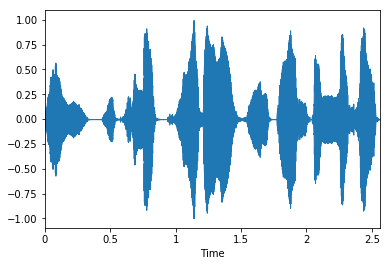

read: belevskaya_b12.wav
(12297,)


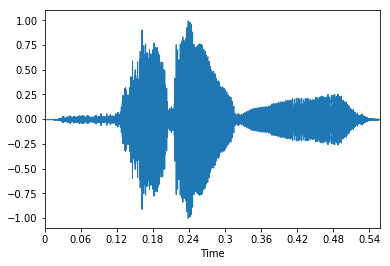

read: belevskaya_b13.wav
(63394,)


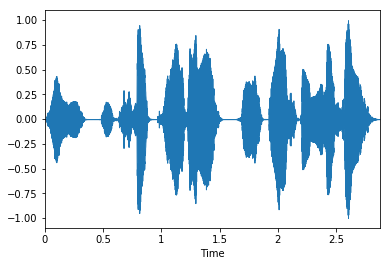

read: belevskaya_b14.wav
(79932,)


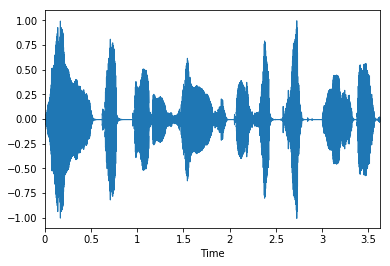

read: belevskaya_b15.wav
(67423,)


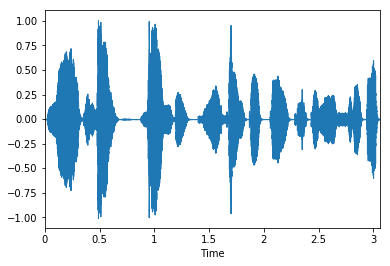

read: belevskaya_b16.wav
(66150,)


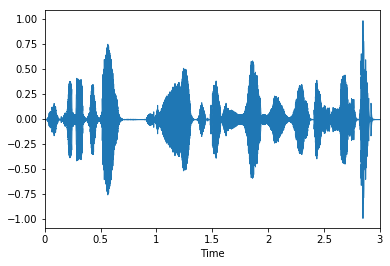

read: belevskaya_b17.wav
(11025,)


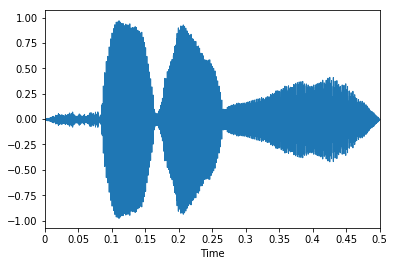

read: kirishima_04_su.wav
(22050,)


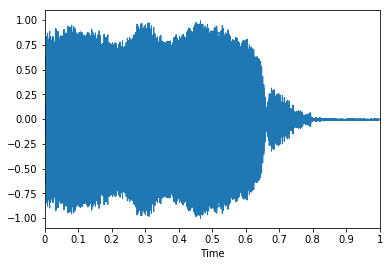

read: kirishima_b01.wav
(132300,)


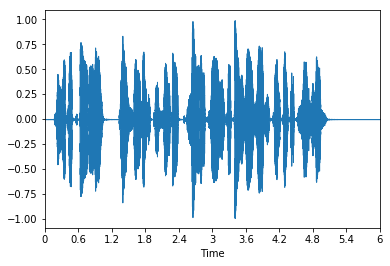

read: kirishima_b02_su.wav
(66150,)


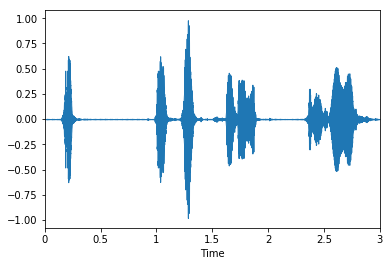

read: kirishima_b03.wav
(50927,)


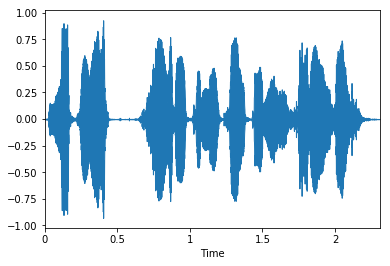

read: kirishima_b04.wav
(27563,)


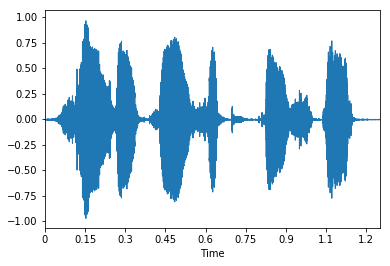

read: kirishima_b05.wav
(33075,)


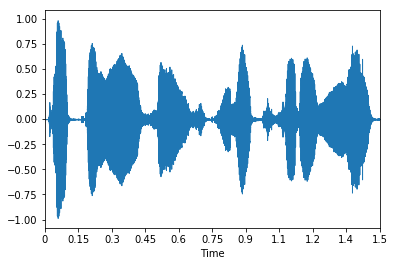

read: kirishima_b06.wav
(28308,)


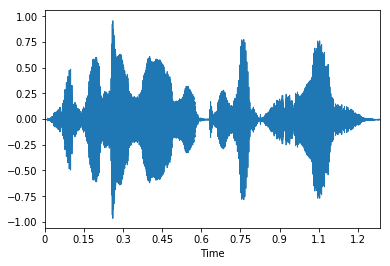

read: kirishima_b07.wav
(11025,)


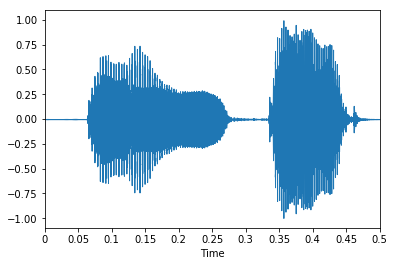

read: kirishima_c01.wav
(21995,)


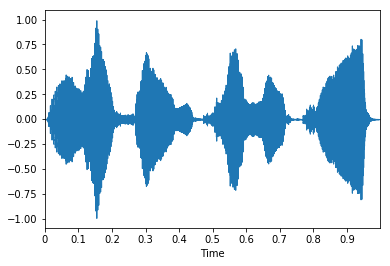

read: kirishima_c02.wav
(24353,)


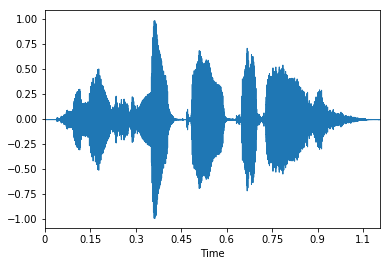

read: kirishima_c03.wav
(19294,)


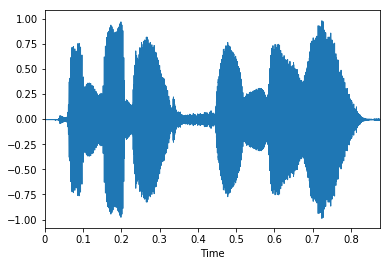

read: kirishima_c04.wav
(39966,)


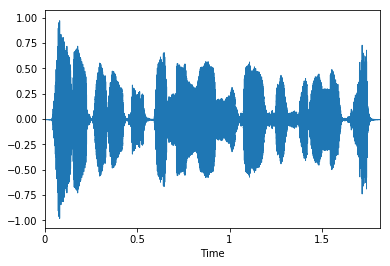

read: kirishima_c05.wav
(31697,)


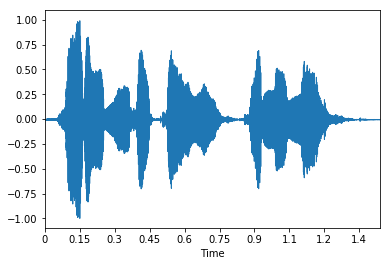

read: kirishima_c06.wav
(60638,)


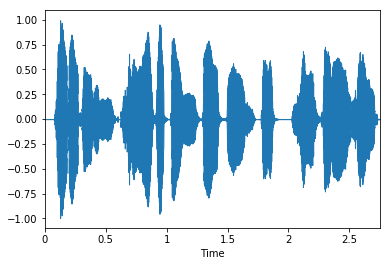

read: kirishima_c07.wav
(8269,)


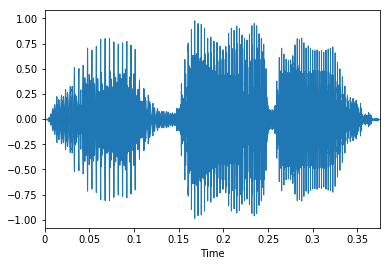

read: kirishima_c08.wav
(6263,)


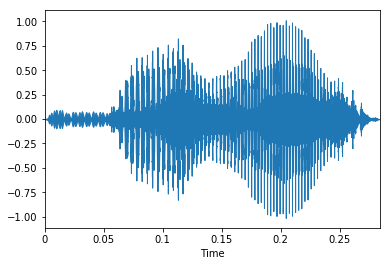

read: kirishima_c09.wav
(16538,)


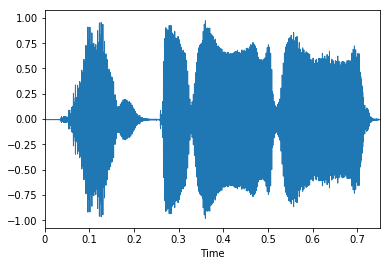

read: suzutsuki_b01.wav
(15038,)


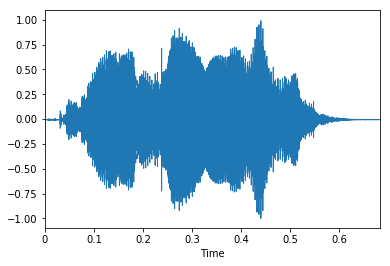

read: suzutsuki_b02.wav
(33075,)


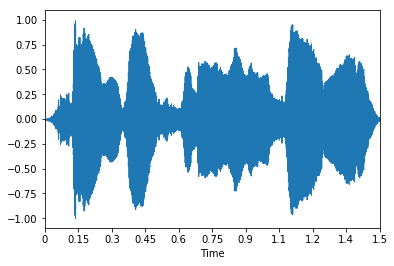

read: suzutsuki_b03.wav
(55125,)


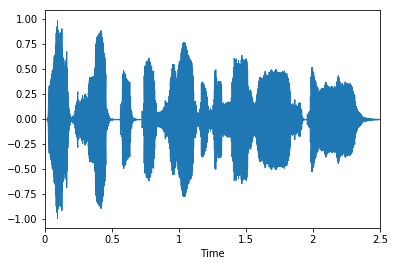

read: suzutsuki_b04.wav
(20672,)


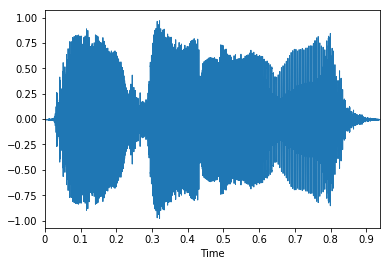

read: suzutsuki_b05.wav
(24504,)


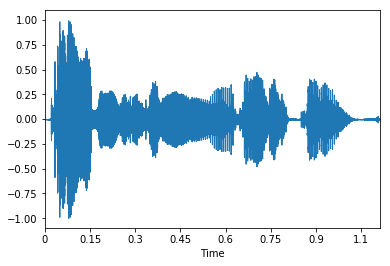

read: suzutsuki_b06.wav
(66150,)


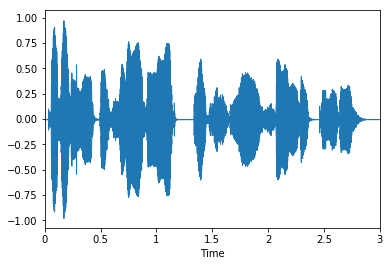

read: suzutsuki_b07.wav
(66150,)


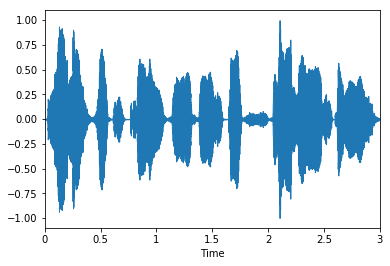

read: suzutsuki_b08.wav
(11025,)


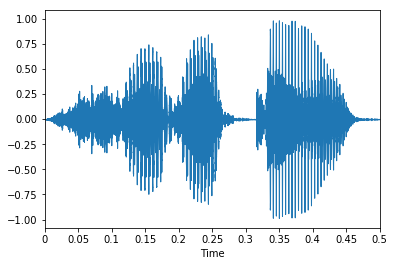

read: suzutsuki_b09.wav
(52369,)


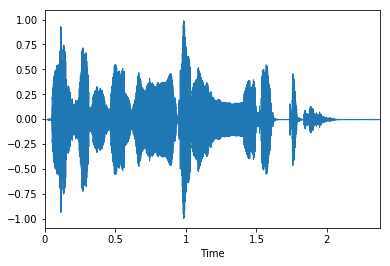

read: suzutsuki_b10.wav
(71663,)


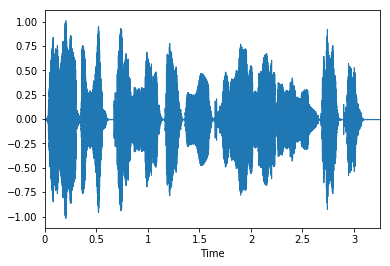

read: suzutsuki_b11.wav
(51237,)


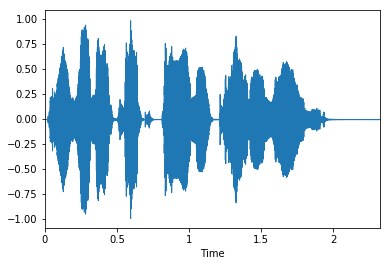

read: suzutsuki_b12.wav
(13719,)


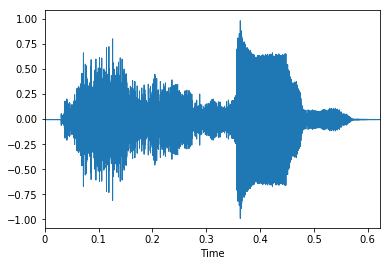

In [17]:
# 音声データを読み込む
dir_name = 'voiceset'
for file_name in sorted(os.listdir(path=dir_name)):
    print("read: {}".format(file_name))
    a, sr = librosa.load(os.path.join(dir_name, file_name))
    print(a.shape)
    librosa.display.waveplot(a, sr)
    plt.show()

In [18]:
# 音声データを読み込む
speakers = {'kirishima': 0, 'suzutsuki': 1, 'belevskaya': 2}

# 特徴量を返す
def get_feat(file_name):
    a, sr = librosa.load(file_name)
    return a[0:5000]

def get_data(dir_name):
    data_X = []
    data_y = []
    for file_name in sorted(os.listdir(path=dir_name)):
        print("read: {}".format(file_name))
        speaker = file_name[0:file_name.index('_')]
        data_X.append(get_feat(os.path.join(dir_name, file_name)))
        data_y.append((speakers[speaker], file_name))
    
    return (np.array(data_X), np.array(data_y))

data_X, data_y = get_data('voiceset')

print("===== data_X =====")
print(data_X.shape)
print(data_X)
print("===== data_y =====")
print(data_y.shape)
print(data_y)

read: belevskaya_06_su.wav
read: belevskaya_07_su.wav
read: belevskaya_b01.wav
read: belevskaya_b02.wav
read: belevskaya_b03.wav
read: belevskaya_b04.wav
read: belevskaya_b05.wav
read: belevskaya_b06.wav
read: belevskaya_b07.wav
read: belevskaya_b08_su.wav
read: belevskaya_b09_su.wav
read: belevskaya_b10.wav
read: belevskaya_b11.wav
read: belevskaya_b12.wav
read: belevskaya_b13.wav
read: belevskaya_b14.wav
read: belevskaya_b15.wav
read: belevskaya_b16.wav
read: belevskaya_b17.wav
read: kirishima_04_su.wav
read: kirishima_b01.wav
read: kirishima_b02_su.wav
read: kirishima_b03.wav
read: kirishima_b04.wav
read: kirishima_b05.wav
read: kirishima_b06.wav
read: kirishima_b07.wav
read: kirishima_c01.wav
read: kirishima_c02.wav
read: kirishima_c03.wav
read: kirishima_c04.wav
read: kirishima_c05.wav
read: kirishima_c06.wav
read: kirishima_c07.wav
read: kirishima_c08.wav
read: kirishima_c09.wav
read: suzutsuki_b01.wav
read: suzutsuki_b02.wav
read: suzutsuki_b03.wav
read: suzutsuki_b04.wav
read: 

In [19]:
# 教師データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, random_state=11813)
print("{} -> {}, {}".format(len(data_X), len(train_X), len(test_X)))

48 -> 36, 12


In [20]:
clf = svm.SVC(gamma=0.0001, C=1)
clf.fit(train_X, train_y.T[0])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
clf.predict(np.array([test_X[0]]))

array(['2'], dtype='<U21')

In [22]:
ok_count = 0

for X, y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

x file: suzutsuki_b06.wav, actual: 2, expected: 1
x file: kirishima_04_su.wav, actual: 2, expected: 0
x file: kirishima_c01.wav, actual: 2, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
o file: belevskaya_b14.wav, actual: 2, expected: 2
x file: kirishima_b04.wav, actual: 2, expected: 0
x file: suzutsuki_b08.wav, actual: 2, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
x file: suzutsuki_b03.wav, actual: 2, expected: 1
o file: belevskaya_b10.wav, actual: 2, expected: 2
x file: kirishima_b01.wav, actual: 2, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
5/12


In [23]:
clf = svm.SVC(gamma=0.01, C=1)
clf.fit(train_X, train_y.T[0])
clf.predict(np.array([test_X[0]]))

ok_count = 0

for X, y in zip(test_X, test_y):
    actual = clf.predict(np.array([X]))[0]
    expected = y[0]
    file_name = y[1]
    ok_count += 1 if actual == expected else 0
    result = 'o' if actual == expected else 'x'
    print("{} file: {}, actual: {}, expected: {}".format(result, file_name, actual, expected))

print("{}/{}".format(ok_count, len(test_X)))

x file: suzutsuki_b06.wav, actual: 2, expected: 1
o file: kirishima_04_su.wav, actual: 0, expected: 0
x file: kirishima_c01.wav, actual: 2, expected: 0
o file: belevskaya_b04.wav, actual: 2, expected: 2
x file: belevskaya_b14.wav, actual: 0, expected: 2
x file: kirishima_b04.wav, actual: 2, expected: 0
x file: suzutsuki_b08.wav, actual: 2, expected: 1
o file: belevskaya_b07.wav, actual: 2, expected: 2
x file: suzutsuki_b03.wav, actual: 0, expected: 1
x file: belevskaya_b10.wav, actual: 0, expected: 2
x file: kirishima_b01.wav, actual: 2, expected: 0
o file: belevskaya_07_su.wav, actual: 2, expected: 2
4/12


タイミングが少しずれただけでも予測がうまくできなくなるので
このままではうまくいかない